In [1]:
   
import pandas as pd 
import numpy as np
import yfinance
from IPython.display import HTML
import random
#from ipynb.fs.full.Functions1 import hide_toggle
#from operator import itemgetter 
import matplotlib.dates as mpl_dates
import matplotlib.pyplot as plt
%matplotlib inline
#from mpl_finance import candlestick_ohlc
from mplfinance.original_flavor import candlestick_ohlc
import pandas_datareader as pdr
import datetime as dt
import talib
from itertools import compress
from ipynb.fs.full.Hide import hide_toggle



plt.rcParams['figure.figsize'] = [14, 7]
plt.rc('font', size=14)


In [2]:
symbol ="AAPL TSLA DIS SPY AMZN BABA GOOGL MSFT NFLX PYPL COST AAL GC=F"
num_name= symbol.split(' ') 
data_frames_separate = []
for i in num_name:
        ticker = yfinance.Ticker(i)
        df=ticker.history(interval='1d',start="2020-06-01",end="2021-02-07")
        df['Date'] = pd.to_datetime(df.index) # just to crate another column for date!!!
        df['Date'] = df['Date'].apply(mpl_dates.date2num)
        df = df.loc[:,['Date', 'Open', 'High', 'Low', 'Close']]
        ohlc_data= df.loc[:,['Date', 'Open', 'High', 'Low', 'Close']].values
        data_frames_separate.append(df)

data_frames_separate[0]

,Date,Open,High,Low,Close
Date,,,,,
2020-06-01,18414.0,79.039852,80.184097,78.905526,80.059723
2020-06-02,18415.0,79.786093,80.455228,79.333369,80.430351
2020-06-03,18416.0,80.758709,81.141783,80.171658,80.873131
2020-06-04,18417.0,80.691547,80.997503,79.793561,80.176636
2020-06-05,18418.0,80.432852,82.522339,80.403004,82.460152
...,...,...,...,...,...
2021-02-01,18659.0,133.550432,135.178005,130.734633,133.939850
2021-02-02,18660.0,135.527476,136.106612,134.409152,134.788589
2021-02-03,18661.0,135.557435,135.567429,133.410649,133.740158


In [3]:
def isSupport(df,i):
  support = df['Low'][i] < df['Low'][i-1]  and df['Low'][i] < df['Low'][i+1] \
  and df['Low'][i+1] < df['Low'][i+2] and df['Low'][i-1] < df['Low'][i-2]

  return support

def isResistance(df,i):
  resistance = df['High'][i] > df['High'][i-1]  and df['High'][i] > df['High'][i+1] \
  and df['High'][i+1] > df['High'][i+2] and df['High'][i-1] > df['High'][i-2] 

  return resistance
#hide_toggle()

In [4]:
levels = [[] for i in range(len(num_name))]
for a in range(len(levels)):
    for i in range(2,data_frames_separate[a].shape[0]-2):
      if isSupport(data_frames_separate[a],i):
        levels[a].append((i,data_frames_separate[a]['Low'][i]))
      elif isResistance(data_frames_separate[a],i):
        levels[a].append((i,data_frames_separate[a]['High'][i]))
len(levels)
levels

[[(7, 88.24852314137503),
  (10, 82.72878695359177),
  (14, 85.85556496299229),
  (16, 92.6289857647199),
  (20, 87.38039621398389),
  (33, 95.3602360805086),
  (35, 98.75317951084412),
  (44, 111.07866271819474),
  (50, 108.75706187198737),
  (66, 137.53683463561444),
  (68, 110.53384557213992),
  (72, 109.64670521872384),
  (74, 118.44834903512589),
  (81, 104.66276201280655),
  (94, 124.98726641834172),
  (108, 106.97531438045687),
  (114, 113.95970798919319),
  (124, 112.42200146115039),
  (134, 125.76206555808128),
  (135, 119.97072837387739),
  (140, 129.386656925025),
  (142, 123.26579915304578),
  (147, 138.58291153881558),
  (154, 132.43210269724648),
  (156, 126.67071086932953),
  (160, 126.75059554424776),
  (168, 130.01571849984316)],
 [(7, 205.49600219726562),
  (10, 181.6999969482422),
  (25, 285.8999938964844),
  (29, 358.99798583984375),
  (38, 273.3080139160156),
  (40, 312.94000244140625),
  (43, 284.1960144042969),
  (50, 273.0),
  (65, 502.489990234375),
  (69, 329.

In [5]:
def plot_all(num):
  fig, ax = plt.subplots()

  candlestick_ohlc(ax,data_frames_separate[num].values,width=0.6, \
                   colorup='green', colordown='red', alpha=0.8)

  date_format = mpl_dates.DateFormatter('%d %b %Y')
  ax.xaxis.set_major_formatter(date_format)
  fig.autofmt_xdate()
  plt.title(num_name[num])
  fig.tight_layout()

  for level in levels[num]:
    plt.hlines(level[1],xmin=data_frames_separate[num]['Date'][level[0]],\
               xmax=max(data_frames_separate[num]['Date']),colors='blue')


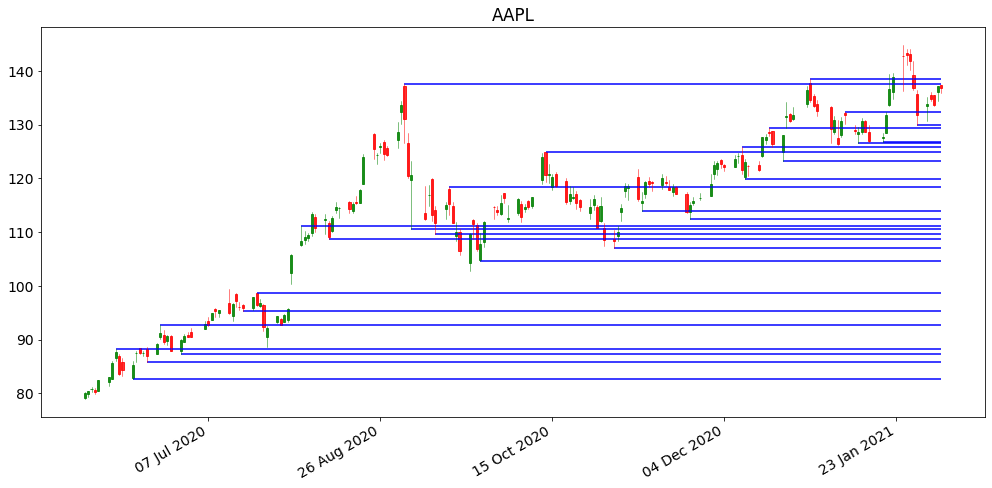

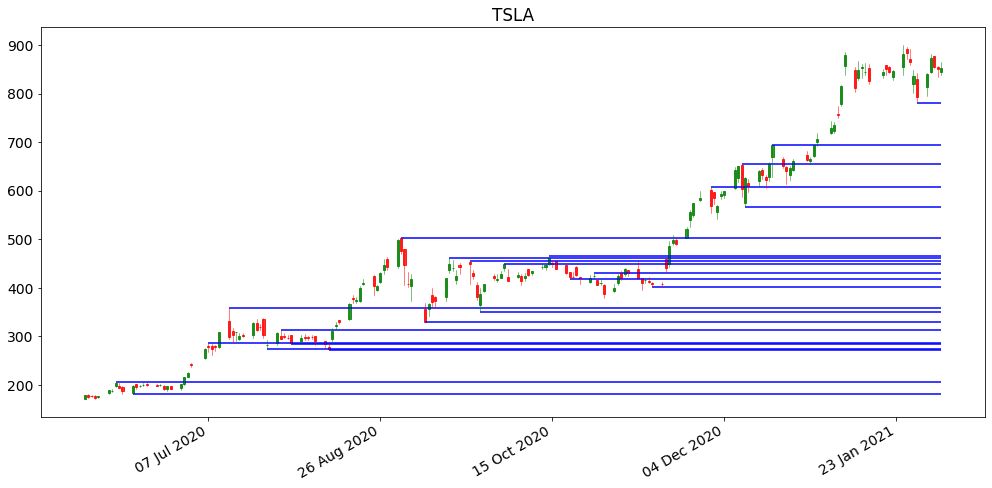

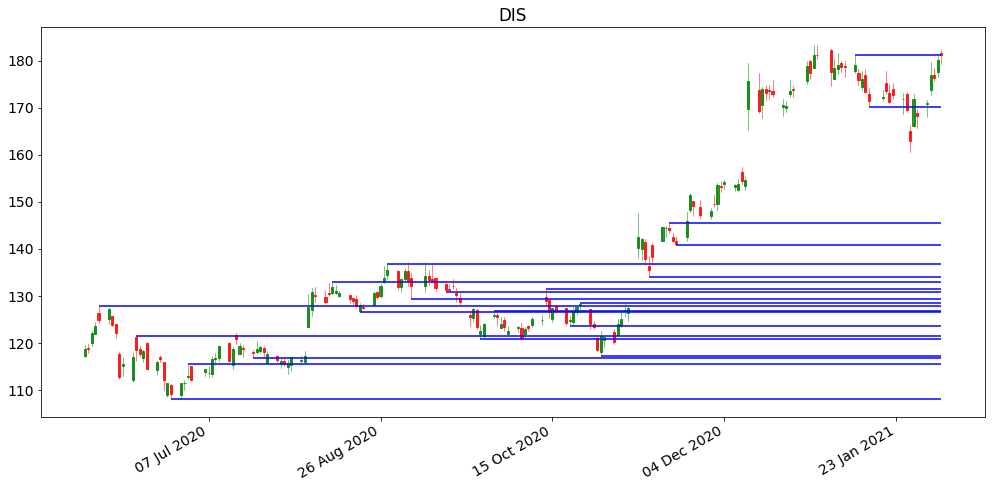

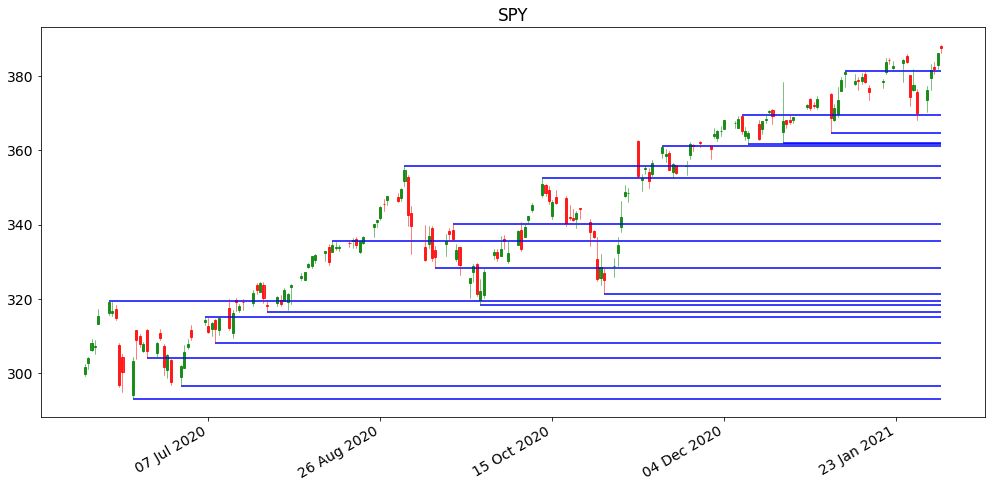

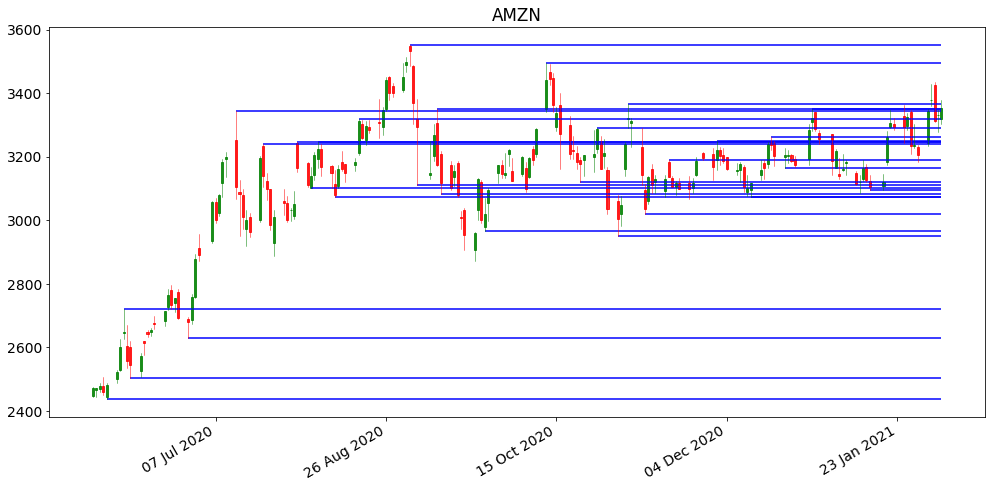

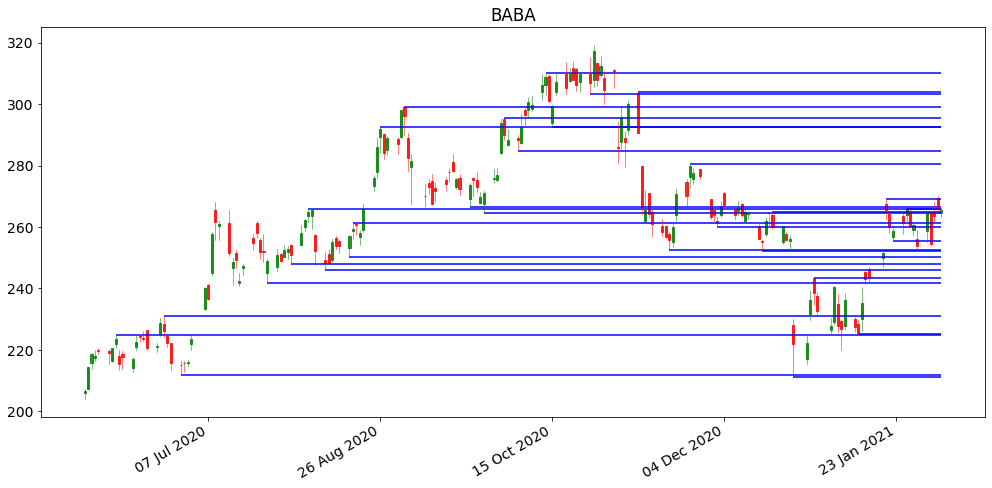

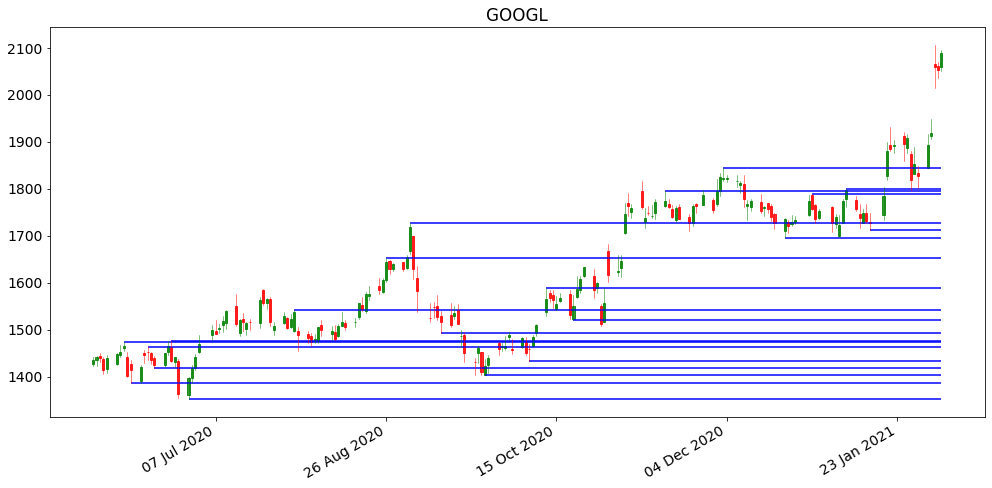

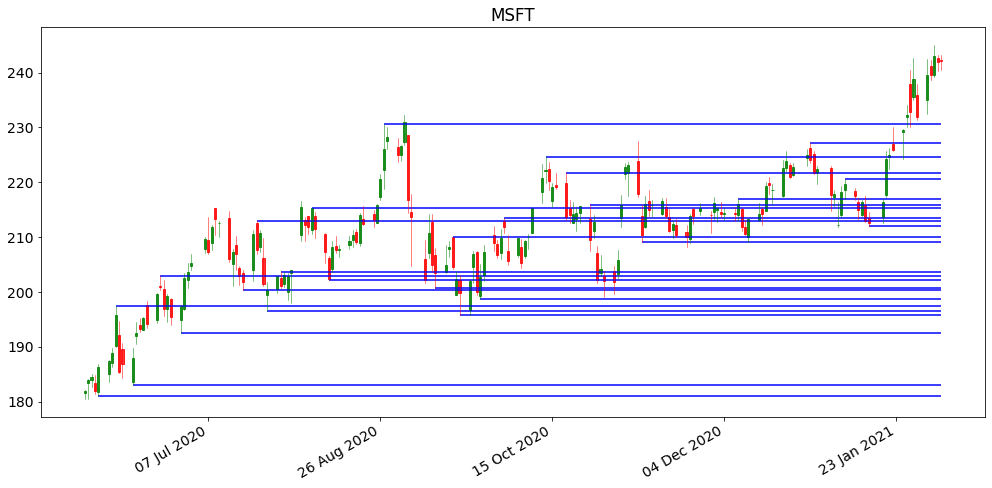

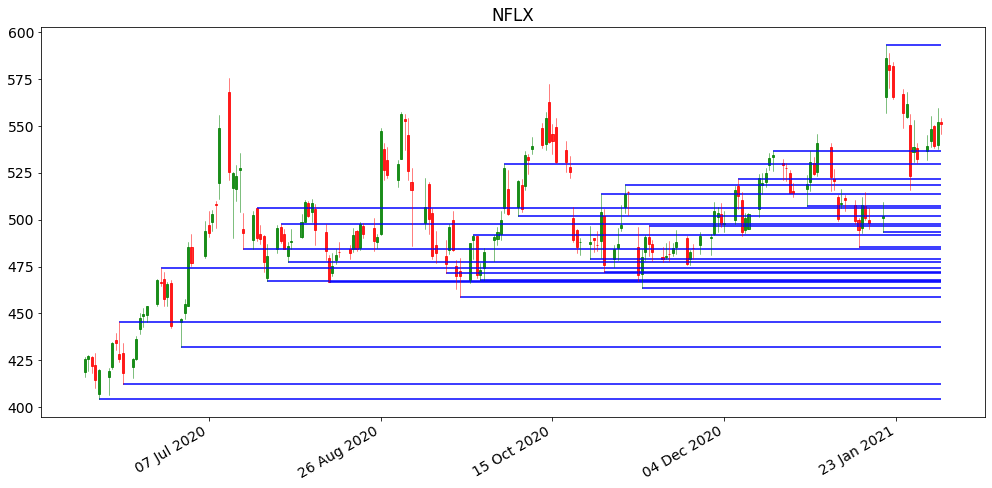

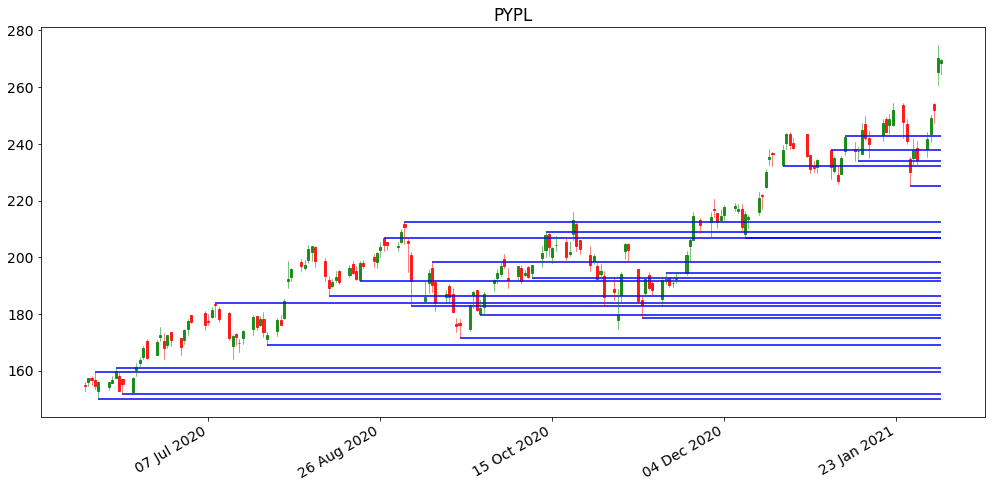

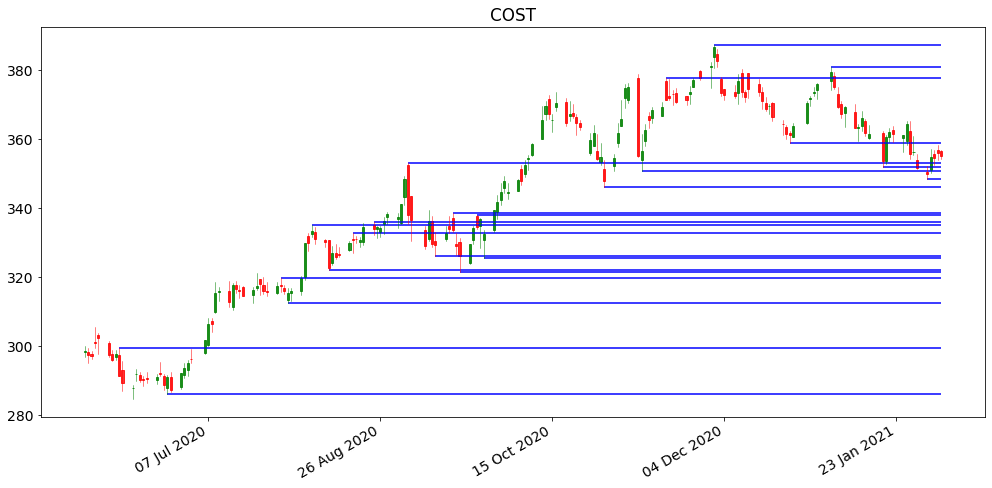

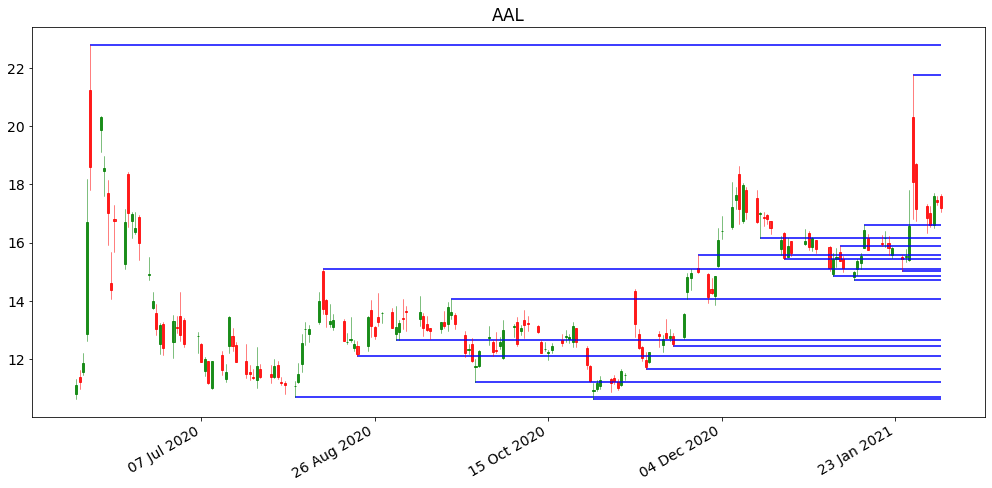

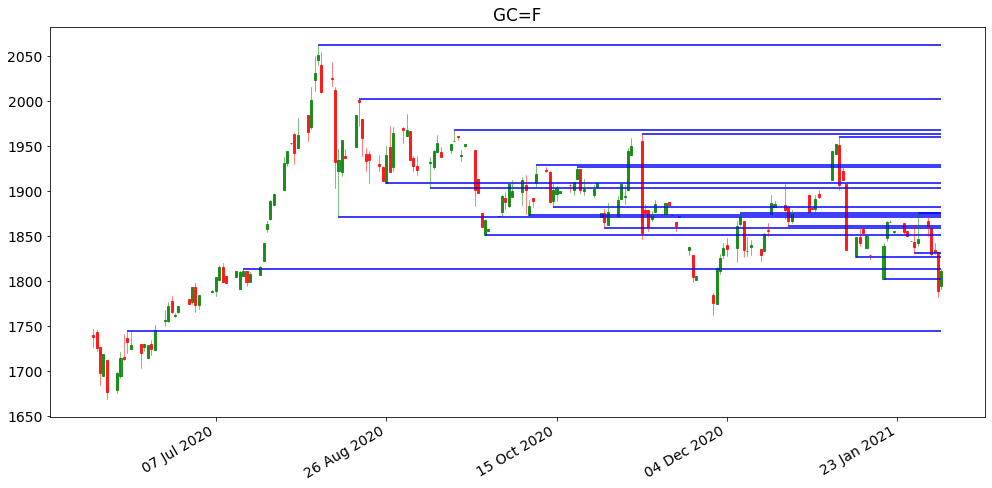

In [6]:
for i in range(len(num_name)):
    plot_all(i)

In [7]:
s=[]
for num in range(len(num_name)):
     s.append(np.mean(data_frames_separate[num]['High'] - data_frames_separate[num]['Low']))
s

[3.2096465859691663,
 23.594932205375585,
 3.412700872311647,
 4.602284718483298,
 84.475621015176,
 6.85906877188847,
 38.553329993938576,
 4.870686000672172,
 16.646146576980065,
 6.413196081402658,
 5.517621933251668,
 0.8587931161639334,
 22.286050486010176]

In [13]:
def isFarFromLevel(l,num):

  return np.sum([abs(l-x) < s[num]  for x in levels[num]]) == 0

In [14]:
len(levels)
levels


[[(2, 34.62331202532922),
  (6, 37.67845345109018),
  (13, 38.495267674466085),
  (15, 36.98842971911468),
  (25, 42.8085574027805),
  (27, 41.24131845771408),
  (37, 43.06561791616511),
  (42, 43.52597358077648),
  (46, 41.505783421565624),
  (58, 45.19845540627146),
  (78, 51.05089392050064),
  (91, 44.94725296290946),
  (94, 47.31198851091056),
  (105, 41.854901205322946),
  (119, 49.37191764727032),
  (142, 50.81731097743828),
  (162, 52.91282467553399),
  (166, 50.16897777121598),
  (176, 55.86886948809403),
  (181, 55.21251926095524),
  (189, 56.31301973223136),
  (191, 53.083078145034186),
  (193, 56.73496244286446),
  (198, 58.75830021337894),
  (211, 58.543629149511005),
  (224, 66.3272197328586),
  (233, 63.42912111162705),
  (236, 67.06969892200381),
  (246, 68.94071620064885),
  (253, 74.39538375959914),
  (271, 81.13948116603778),
  (274, 74.79632558719902),
  (277, 80.48858418594696),
  (279, 77.85897647273852),
  (281, 81.1757580700274),
  (286, 80.53820487420776),
  (29

In [15]:
levels = [[] for i in range(len(num_name))]
for num in range(len(levels)):
    for i in range(2,df.shape[0]-2):
        if isSupport(data_frames_separate[num],i):
            l = data_frames_separate[num]['Low'][i]

            if isFarFromLevel(l,num):
                  levels[num].append((i,l))

        elif isResistance(data_frames_separate[num],i):
            l = data_frames_separate[num]['High'][i]

            if isFarFromLevel(l,num):
                  levels[num].append((i,l))
#levels

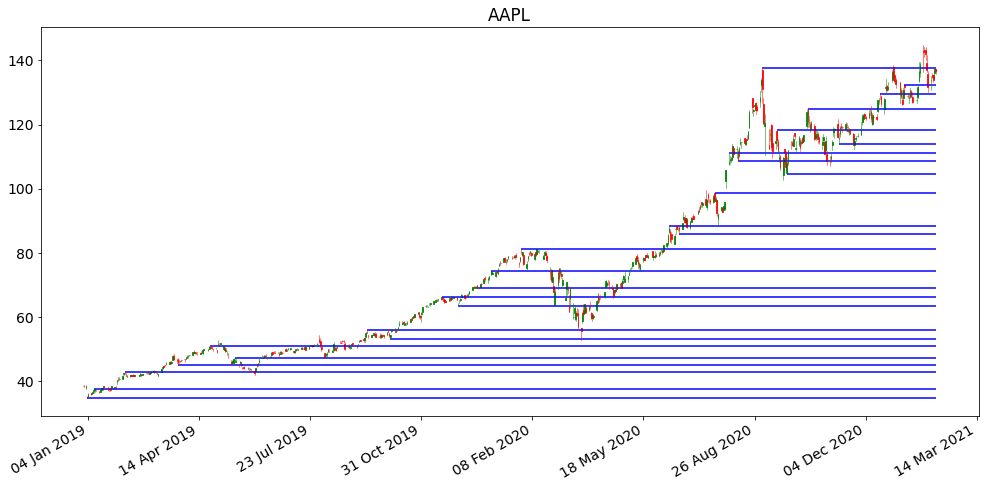

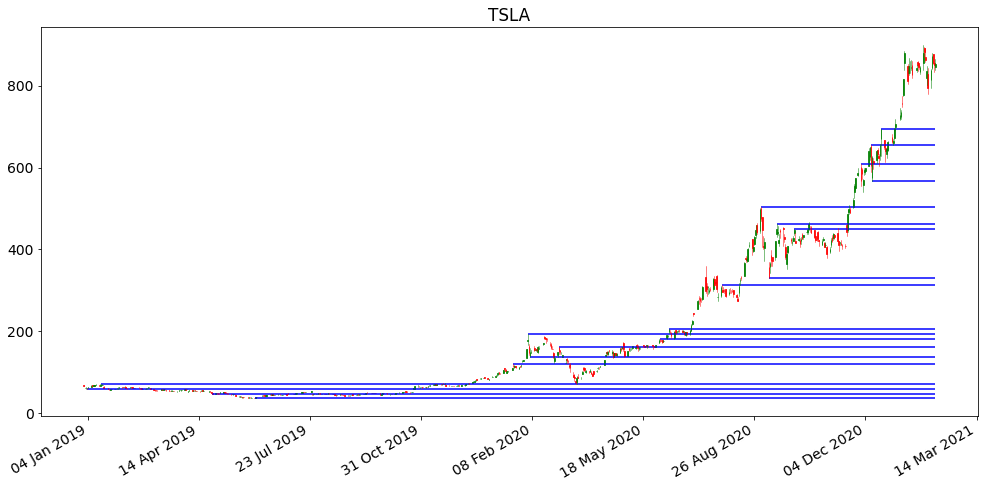

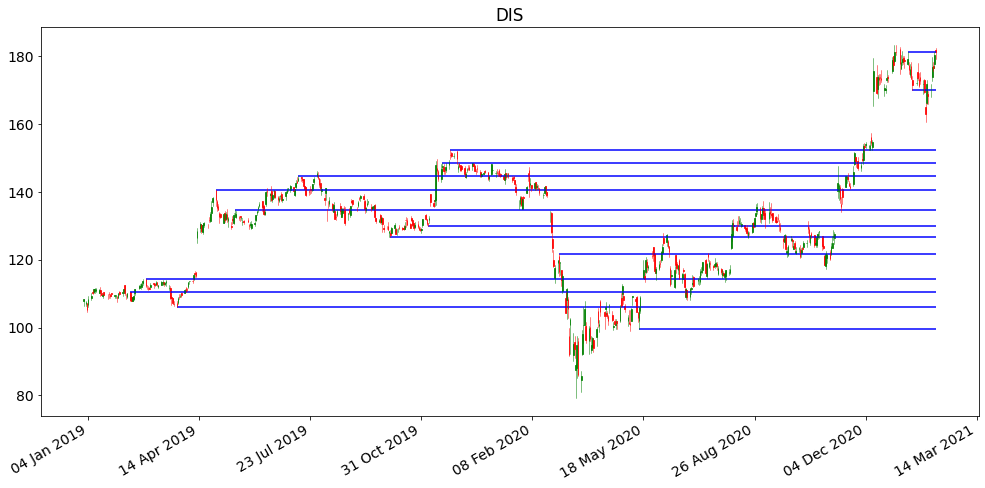

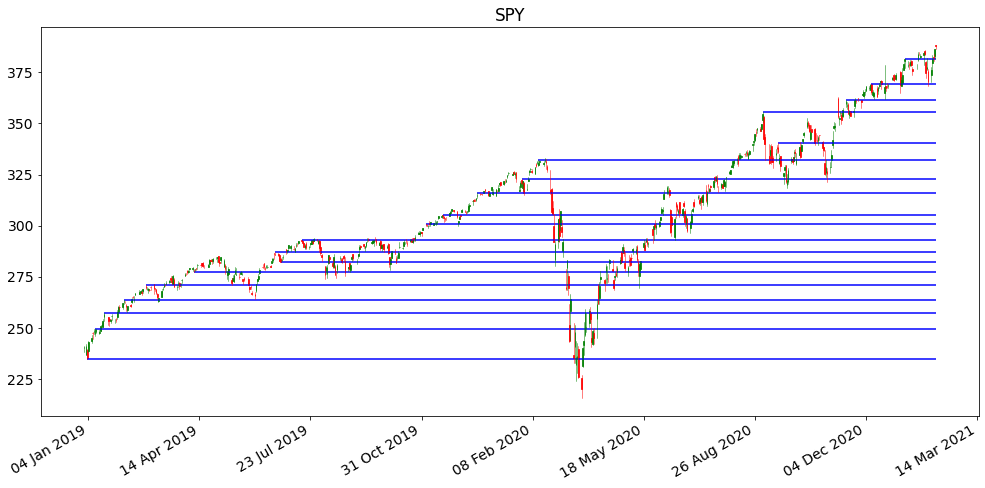

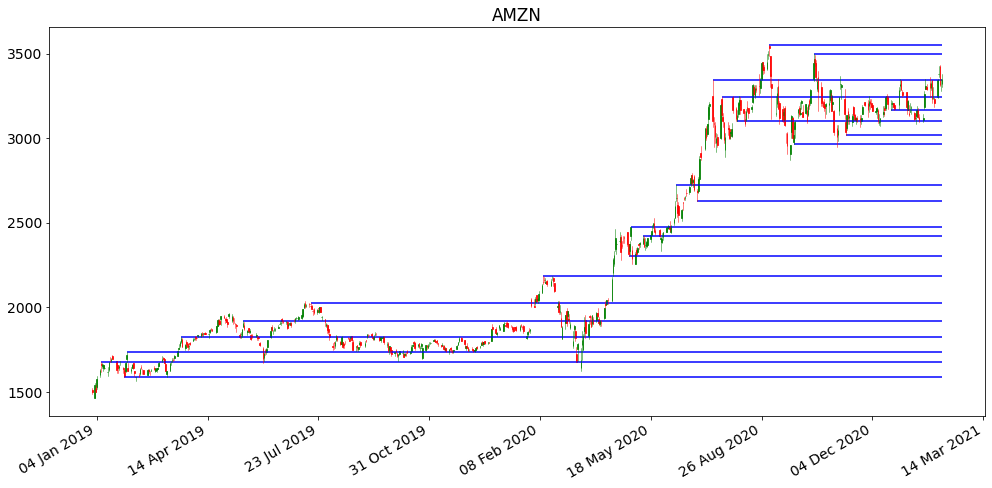

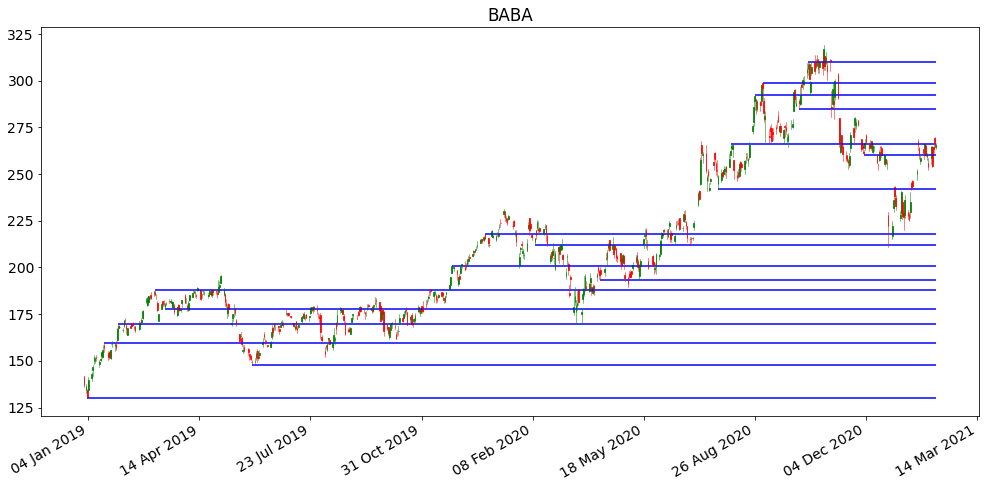

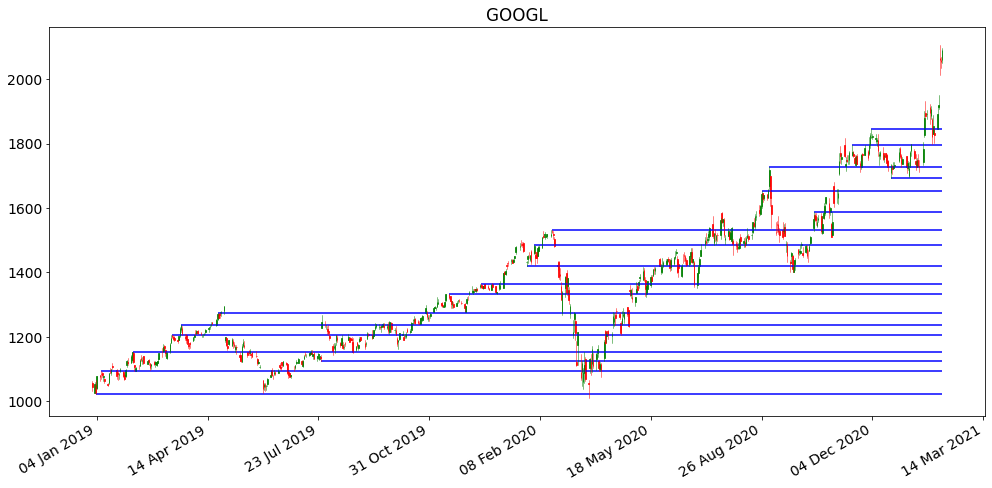

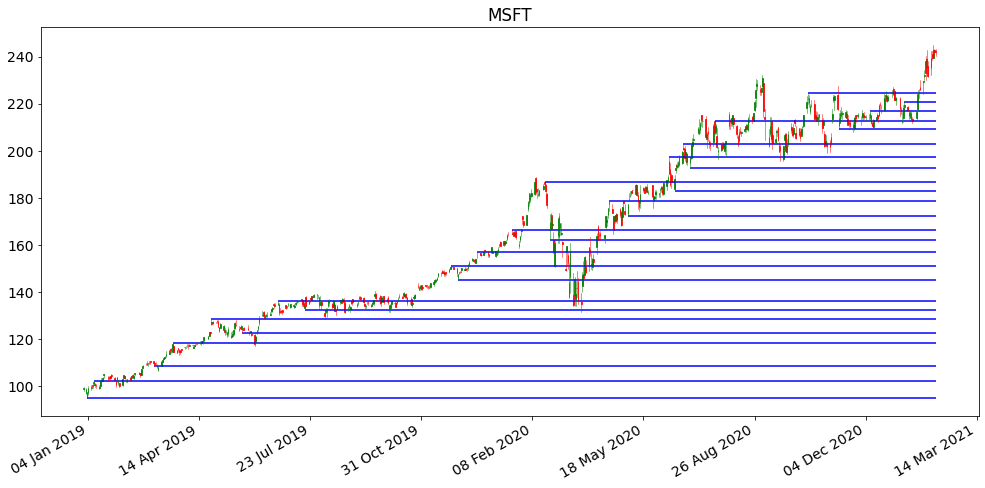

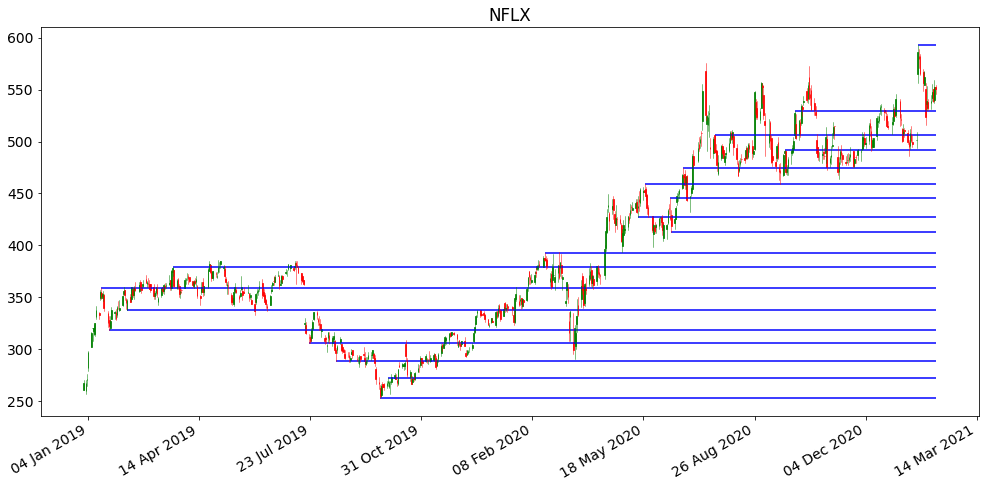

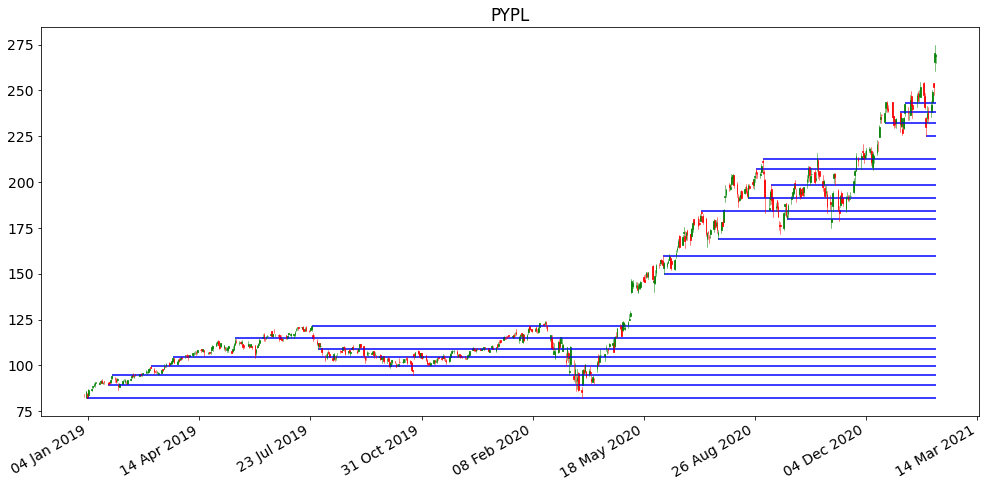

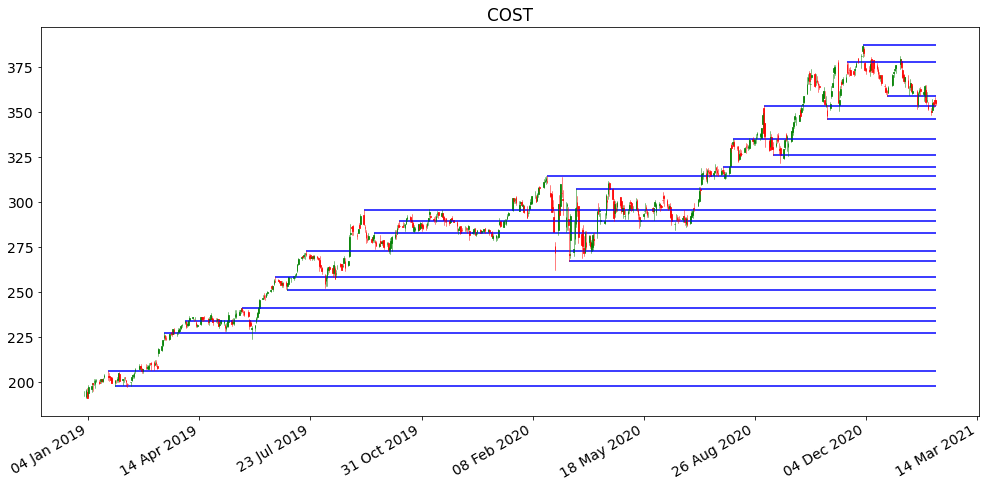

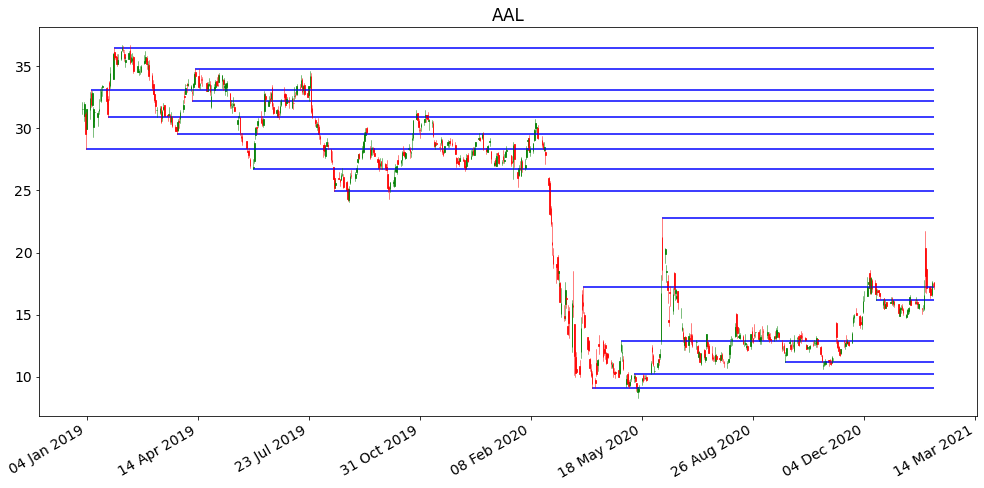

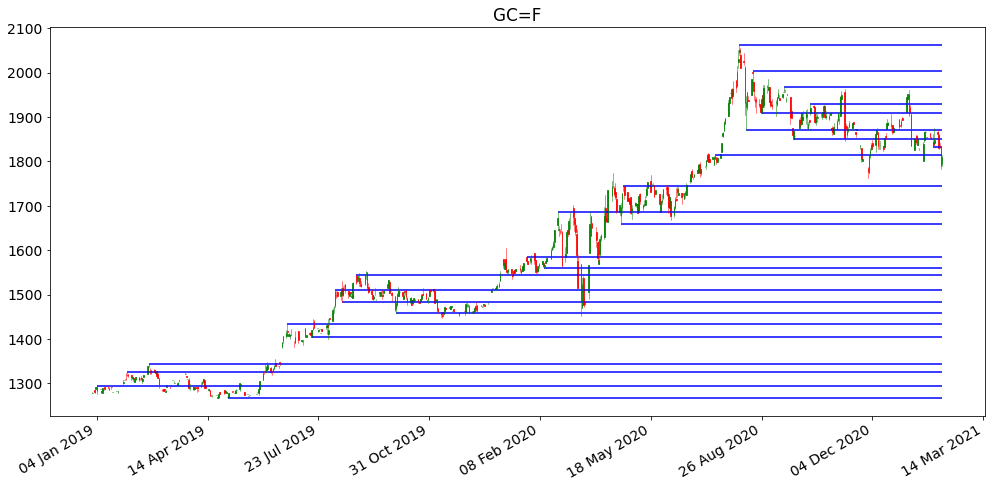

In [16]:
for i in range(len(num_name)):
    plot_all(i)